# Metrics Generator
Classification Report: A summary with precision, recall, and F1 scores for each emotion.
Confusion Matrix: A heatmap visual that displays true vs. predicted classifications, showing which emotions are commonly confused.
ROC Curve: Displays the model’s ability to distinguish between emotions, with AUC providing a summary score for each.
Precision-Recall Curve: Captures how precision and recall vary with different thresholds for each emotion, helpful for understanding performance on imbalanced data.
Training/Validation Curves: Line charts showing the learning progression over epochs, highlighting if the model is overfitting or converging well.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                             precision_recall_curve, cohen_kappa_score, matthews_corrcoef,
                             top_k_accuracy_score)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import tensorflow as tf

def evaluate_classification_model(model, history, test_features, test_labels, class_names):
    """
    Evaluates a classification model and generates key metrics and visualizations.

    Parameters:
    - model: Trained Keras/TensorFlow model.
    - history: Dictionary containing training history.
    - test_features: Numpy array of test features.
    - test_labels: Numpy array of one-hot encoded test labels.
    - class_names: List of class names corresponding to emotions.

    Returns:
    - None (generates visualizations and prints metrics).
    """

    # Predict classes and probabilities
    predictions = model.predict(test_features)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_labels, axis=1)
    
    # Generate the classification report with macro and micro averages
    report = classification_report(true_classes, predicted_classes, target_names=class_names, digits=4, output_dict=True)
    print("Classification Report:")
    print("Per-Class Metrics:")
    for class_name in class_names:
        print(f"{class_name}: Precision={report[class_name]['precision']:.4f}, "
              f"Recall={report[class_name]['recall']:.4f}, "
              f"F1-Score={report[class_name]['f1-score']:.4f}")
    print("\nOverall Metrics:")
    print(f"Accuracy: {report['accuracy']:.4f}")
    print(f"Macro Avg: Precision={report['macro avg']['precision']:.4f}, "
          f"Recall={report['macro avg']['recall']:.4f}, "
          f"F1-Score={report['macro avg']['f1-score']:.4f}")
    print(f"Weighted Avg: Precision={report['weighted avg']['precision']:.4f}, "
          f"Recall={report['weighted avg']['recall']:.4f}, "
          f"F1-Score={report['weighted avg']['f1-score']:.4f}")

    # Confusion Matrix - Raw Counts
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Raw Counts')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Confusion Matrix - Normalized
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Normalized')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Domain-Specific Error Analysis
    # Identify misclassifications between specific emotions
    # print("\nMisclassified Samples:")
    # misclassified_indices = np.where(predicted_classes != true_classes)[0]
    # for idx in misclassified_indices[:5]:  # Display first 5 misclassified examples
    #     true_label = class_names[true_classes[idx]]
    #     predicted_label = class_names[predicted_classes[idx]]
    #     print(f"Sample {idx}: True Label='{true_label}', Predicted Label='{predicted_label}'")
        # Optionally, display the image or data corresponding to this sample
        # For example:
        # plt.imshow(test_features[idx])
        # plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        # plt.show()

    # Training and Validation Curves
    plt.figure(figsize=(14, 5))

    # Accuracy Curve
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss Curve
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


In [7]:
# dummy model to test graphs on
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a dummy model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

# Save the history for your evaluation function
history_dict = history.history

# Display model's history keys to confirm it's ready for evaluation
print("History Keys: ", history_dict.keys())

# Test your evaluation function
class_names = [str(i) for i in range(10)]  # Class names for MNIST


Epoch 1/5


c:\Users\snowac\Documents\inzynierka\thesis\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8539 - loss: 0.5117 - val_accuracy: 0.9581 - val_loss: 0.1390
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.1167 - val_accuracy: 0.9667 - val_loss: 0.1126
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9756 - loss: 0.0813 - val_accuracy: 0.9729 - val_loss: 0.0894
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9814 - loss: 0.0595 - val_accuracy: 0.9758 - val_loss: 0.0789
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0433 - val_accuracy: 0.9748 - val_loss: 0.0879
History Keys:  dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
Per-Class Metrics:
0: Precision=0.9798, Recall=0.9878, F1-Score=0.9837
1: Precision=0.9877, Recall=0.9912, F1-Score=0.9894
2: Precision=0.9586, Recall=0.9864, F1-Score=0.9723
3: Precision=0.9632, Recall=0.9851, F1-Score=0.9741
4: Precision=0.9715, Recall=0.9735, F1-Score=0.9725
5: Precision=0.9604, Recall=0.9787, F1-Score=0.9695
6: Precision=0.9883, Recall=0.9708, F1-Score=0.9795
7: Precision=0.9794, Recall=0.9708, F1-Score=0.9751
8: Precision=0.9738, Recall=0.9538, F1-Score=0.9637
9: Precision=0.9846, Recall=0.9475, F1-Score=0.9657

Overall Metrics:
Accuracy: 0.9748
Macro Avg: Precision=0.9747, Recall=0.9746, F1-Score=0.9745
Weighted Avg: Precision=0.9750, Recall=0.9748, F1-Score=0.9748


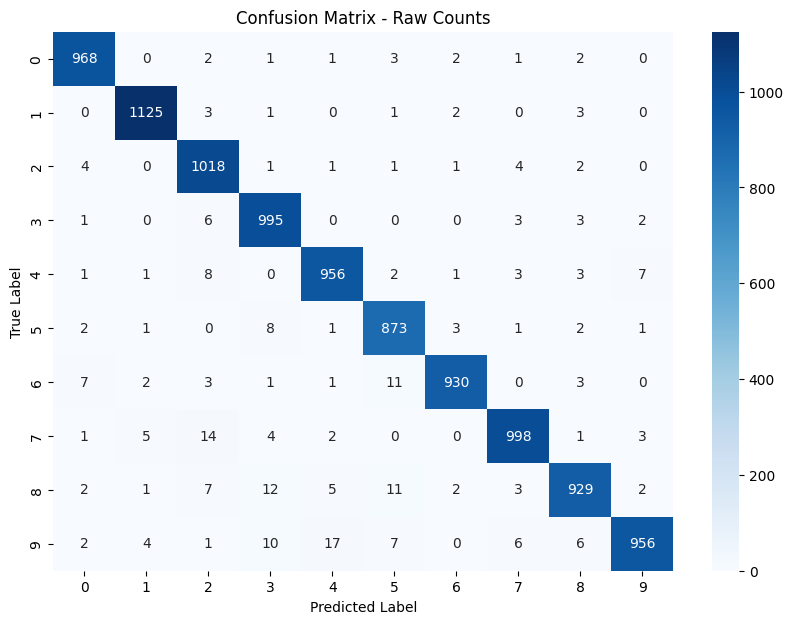

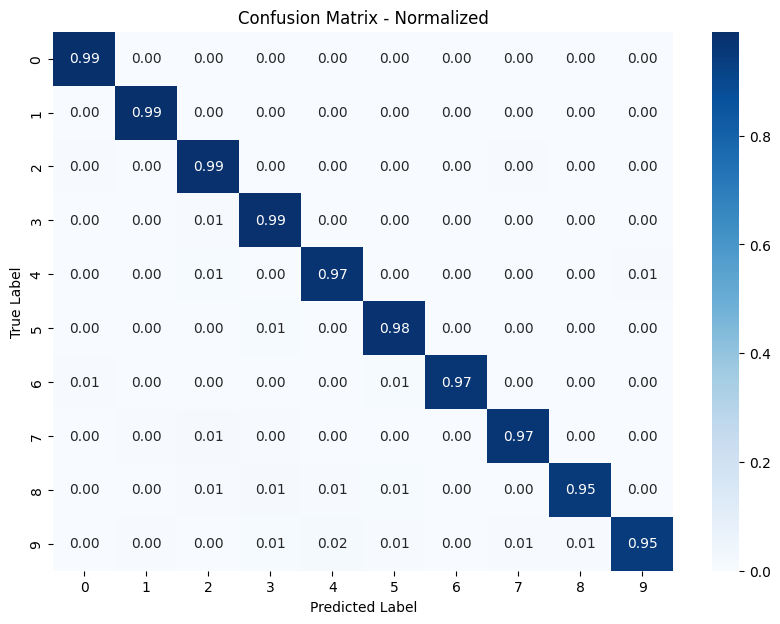

Cohen's Kappa: 0.9720
Matthews Correlation Coefficient: 0.9720
Top-3 Accuracy: 0.9973

Misclassified Samples:
Sample 104: True Label='9', Predicted Label='5'
Sample 124: True Label='7', Predicted Label='4'
Sample 217: True Label='6', Predicted Label='5'
Sample 247: True Label='4', Predicted Label='2'
Sample 259: True Label='6', Predicted Label='0'


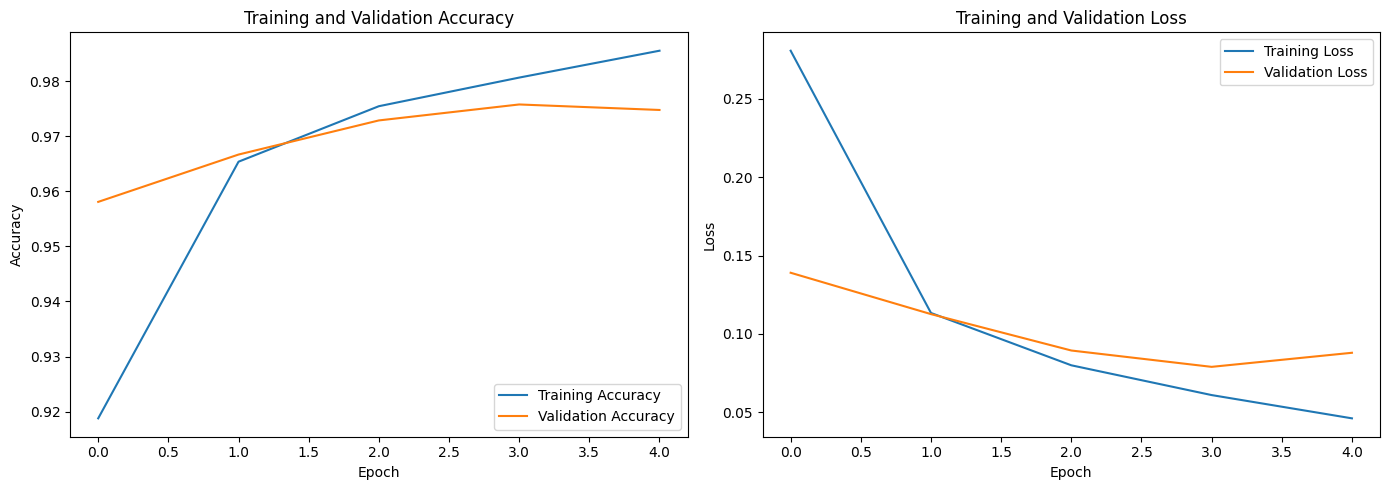

In [17]:
evaluate_classification_model(model, history_dict, x_test, y_test, class_names)